# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

In [1]:
!pip install easyagents >/dev/null

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


##### If in colab: load additional packages for rendering

In [2]:
import sys

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

## Dry Run (very short training, no logging)

In [3]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingDurationFast
from easyagents.config import LoggingSilent

ppoAgent = PpoAgent( gym_env_name='CartPole-v0', training_duration=TrainingDurationFast(), logging=LoggingSilent())
ppoAgent.train()

W0704 15:27:52.669840 13780 deprecation.py:323] From c:\dev\github\easyagents\env\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1221: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0704 15:27:52.827145 13780 deprecation.py:323] From c:\dev\github\easyagents\env\lib\site-packages\tensorflow_core\python\training\optimizer.py:172: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


### Visualize Training (average returns, losses)

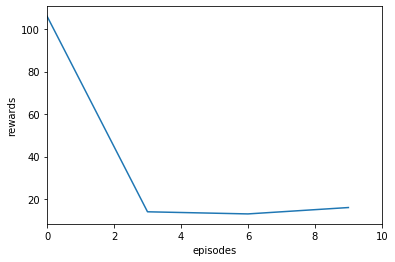

In [4]:
ppoAgent.plot_average_rewards()

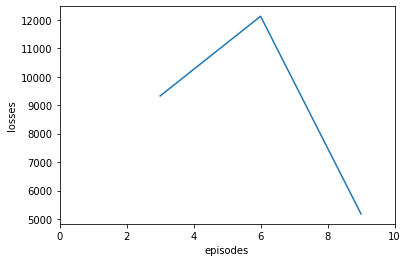

In [5]:
ppoAgent.plot_losses()

## Default training with movie  (self-defined network, default logging)

In [6]:
from easyagents.tfagents import PpoAgent

In [7]:
ppoAgent = PpoAgent( gym_env_name = 'CartPole-v0', fc_layers=(100, 50, 25) )
ppoAgent.train()

I0704 15:27:57.714930 13780 agents.py:92] PpoAgent on CartPole-v0 [fc_layers=(100, 50, 25), learning_rate=0.001]
I0704 15:27:57.717086 13780 agents.py:92] TrainingDuration 250=25*10 episodes [max 500 steps/episode, 5 epochs/iteration]
I0704 15:28:04.981731 13780 agents.py:92] estimated  avg_reward=128.600, avg_steps=128.600
I0704 15:28:11.583129 13780 agents.py:92] training 1 of 25: completed tf_agent.train(...) = 28920.078 [loss]
I0704 15:28:15.075759 13780 agents.py:92] training 2 of 25: completed tf_agent.train(...) = 9659.805 [loss]
I0704 15:28:19.795507 13780 agents.py:92] training 3 of 25: completed tf_agent.train(...) = 9851.806 [loss]
I0704 15:28:21.268518 13780 agents.py:92] training 4 of 25: completed tf_agent.train(...) = 25915.518 [loss]
I0704 15:28:22.795020 13780 agents.py:92] training 5 of 25: completed tf_agent.train(...) = 11914.815 [loss]
I0704 15:28:43.333901 13780 agents.py:92] estimated  avg_reward=395.700, avg_steps=395.700
I0704 15:28:44.811826 13780 agents.py:92

### Visualize Training (average returns, losses)

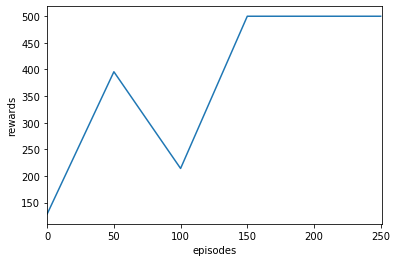

In [8]:
ppoAgent.plot_average_rewards()

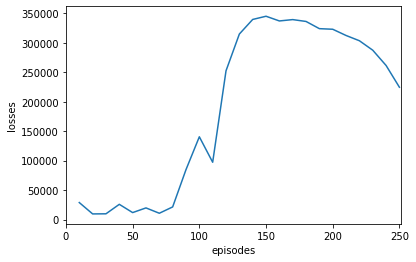

In [9]:
ppoAgent.plot_losses()

### Visualize Trained Policy (playing a game)

In [10]:
from IPython.display import HTML

HTML( ppoAgent.render_episodes_to_html(num_episodes=1, fps=50) )

W0704 15:31:47.321194 13780 ffmpeg.py:839] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (400, 600) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to None (risking incompatibility). You may also see a FFMPEG warning concerning speedloss due to data not being aligned.


## Custom training (self-defined training scheme, logging & movie)

In [11]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingDuration
from easyagents.config import Logging

In [12]:
training_duration=TrainingDuration( num_iterations = 50,
                                    num_episodes_per_iteration = 10,
                                    max_steps_per_episode = 300,
                                    num_epochs_per_iteration = 10,
                                    num_iterations_between_eval = 5,
                                    num_eval_episodes = 10 )

In [13]:
logging=Logging( log_agent = True, log_gym_api = False)

In [ ]:
ppoAgent = PpoAgent( gym_env_name = 'CartPole-v0', 
                     fc_layers=(100, 50, 25),
                     training_duration=training_duration,
                     logging=logging)
ppoAgent.train()

I0704 15:32:14.709851 13780 agents.py:92] PpoAgent on CartPole-v0 [fc_layers=(100, 50, 25), learning_rate=0.001]
I0704 15:32:14.711856 13780 agents.py:92] TrainingDuration 500=50*10 episodes [max 300 steps/episode, 10 epochs/iteration]
I0704 15:32:14.713853 13780 agents.py:87] executing: tf.compat.v1.enable_v2_behavior()
I0704 15:32:14.716445 13780 agents.py:87] executing: tf.enable_eager_execution()
I0704 15:32:14.716957 13780 agents.py:87] executing: tf.compat.v1.set_random_seed(0)
I0704 15:32:14.996657 13780 agents.py:87] Creating environment:
I0704 15:32:14.997756 13780 agents.py:87]    executing tf_py_environment.TFPyEnvironment( suite_gym.load )
I0704 15:32:15.003763 13780 agents.py:87] Creating agent:
I0704 15:32:15.004761 13780 agents.py:87]   creating  tf.compat.v1.train.AdamOptimizer( ... )
I0704 15:32:15.011888 13780 agents.py:87]   creating  PpoAgent( ... )
I0704 15:32:15.027016 13780 agents.py:87]   executing tf_agent.initialize()
I0704 15:32:15.028818 13780 agents.py:87] 

### Visualize Training (average returns, losses)

In [ ]:
ppoAgent.plot_average_rewards()

In [ ]:
ppoAgent.plot_losses()

### Visualize Trained Policy (playing a game)

In [ ]:
from IPython.display import HTML

HTML( ppoAgent.render_episodes_to_html( num_episodes=2, fps=50, width=960, height=720) )